<div align="center" style="color:Blue;font-size:20px">Predict Interest Level of Apartments</div>

### Task1 :Data Loading

- Importing libraries and dataset

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
import reverse_geocoder as rg
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [109]:
df=pd.read_csv("DS2_C5_S6_AllRent_Data_Challenge.csv")
df.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


### Task2 : Data Exploration

In [110]:
df.shape

(9871, 16)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9871 non-null   int64  
 1   bathrooms        9871 non-null   float64
 2   bedrooms         9871 non-null   int64  
 3   building_id      9871 non-null   object 
 4   created          9871 non-null   object 
 5   description      9585 non-null   object 
 6   display_address  9837 non-null   object 
 7   features         9871 non-null   object 
 8   latitude         9871 non-null   float64
 9   listing_id       9871 non-null   int64  
 10  longitude        9871 non-null   float64
 11  manager_id       9871 non-null   object 
 12  photos           9871 non-null   object 
 13  price            9871 non-null   int64  
 14  street_address   9866 non-null   object 
 15  interest_level   9871 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


In [112]:
df.describe()

,Unnamed: 0,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,9871.000000,9871.000000,9871.000000,9871.000000,9.871000e+03,9871.000000,9871.000000
mean,61828.973154,1.210617,1.533685,40.747167,7.024062e+06,-73.965549,3662.860804
std,35901.607107,0.501985,1.106696,0.414548,1.269108e+05,0.760686,2559.911997
min,9.000000,0.000000,0.000000,0.000000,6.812005e+06,-87.613400,43.000000
25%,30968.000000,1.000000,1.000000,40.727500,6.914494e+06,-73.992200,2499.000000
50%,61354.000000,1.000000,1.000000,40.750600,7.022816e+06,-73.978300,3125.000000
75%,93229.500000,1.000000,2.000000,40.773900,7.130978e+06,-73.955100,4047.500000
max,123995.000000,10.000000,8.000000,43.034600,7.742631e+06,0.000000,90000.000000


In [113]:
df.columns

Index(['Unnamed: 0', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'description', 'display_address', 'features', 'latitude', 'listing_id',
       'longitude', 'manager_id', 'photos', 'price', 'street_address',
       'interest_level'],
      dtype='object')

### Task3:  Data Preprocessing

- Dropping unnecessary features for our model

In [114]:
df.drop(["Unnamed: 0","building_id","display_address","listing_id","manager_id","photos","street_address","description","features"],axis=1,inplace=True)

In [115]:
df.head()

,bathrooms,bedrooms,created,latitude,longitude,price,interest_level
0,1.0,0,04-04-2016 03:34,40.7672,-73.9802,2800,high
1,1.0,1,21-04-2016 20:40,40.7483,-73.9741,2100,high
2,1.0,1,14-05-2016 05:44,40.7399,-73.9812,3000,high
3,1.0,2,05-06-2016 03:37,40.7530,-73.9958,3000,high
4,1.0,2,26-05-2016 05:36,40.7695,-73.9603,3300,high


- reverse geoencoding using reverse geocoder
- and dropping lat&long after getting location

In [116]:
l=list(zip(df["latitude"],df["longitude"]))
f=rg.search(l)
df["location"]=[i["name"] for i in f]

In [117]:
df.drop(["latitude","longitude"],axis=1,inplace=True)

In [118]:
df.head()

,bathrooms,bedrooms,created,price,interest_level,location
0,1.0,0,04-04-2016 03:34,2800,high,Manhattan
1,1.0,1,21-04-2016 20:40,2100,high,Long Island City
2,1.0,1,14-05-2016 05:44,3000,high,Long Island City
3,1.0,2,05-06-2016 03:37,3000,high,Weehawken
4,1.0,2,26-05-2016 05:36,3300,high,Manhattan


- converting created column to datetime.
- then subtracting it from current date to get apartment's age

In [119]:
df["created"]=pd.to_datetime(df["created"])

In [120]:
current=pd.to_datetime('today').normalize()

In [121]:
df["days_created"]=current-df["created"]

In [122]:
df.drop("created",axis=1,inplace=True)

In [123]:
df["days_created"]=df["days_created"].apply(lambda x:str(x).split(" ")[0])

In [124]:
df.head()

,bathrooms,bedrooms,price,interest_level,location,days_created
0,1.0,0,2800,high,Manhattan,2428
1,1.0,1,2100,high,Long Island City,2411
2,1.0,1,3000,high,Long Island City,2388
3,1.0,2,3000,high,Weehawken,2396
4,1.0,2,3300,high,Manhattan,2376


In [125]:
df.isnull().sum()

bathrooms         0
bedrooms          0
price             0
interest_level    0
location          0
days_created      0
dtype: int64

### Task4: Visualization

<AxesSubplot:xlabel='interest_level', ylabel='count'>

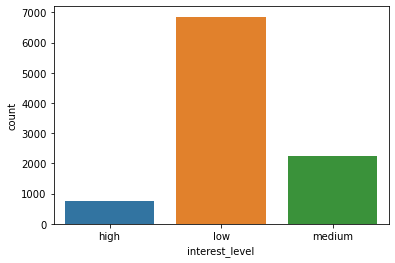

In [126]:
sns.countplot(data=df,x='interest_level')

- low interest level category has highest count

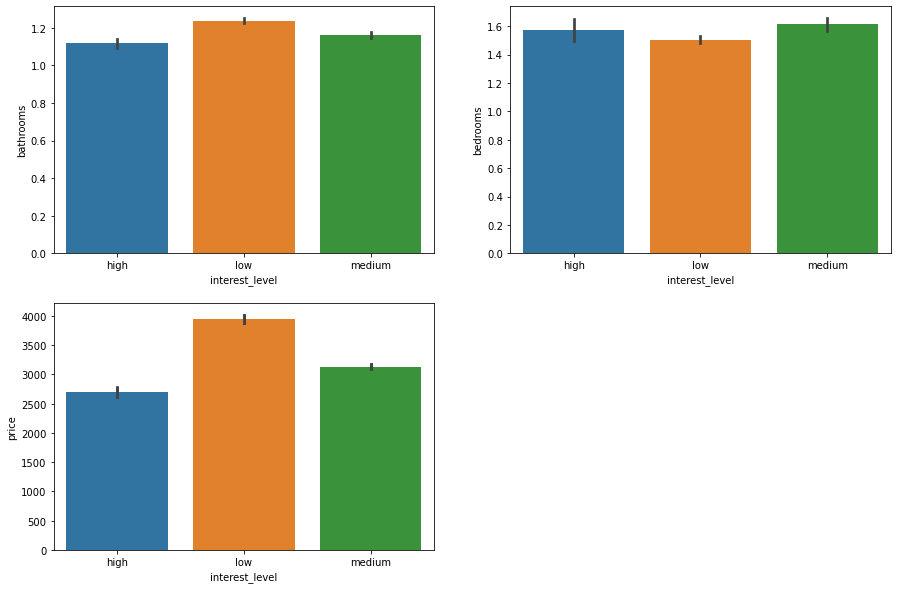

In [127]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(data=df,x="interest_level",y='bathrooms')
plt.subplot(222)
sns.barplot(data=df,x="interest_level",y='bedrooms')
plt.subplot(223)
sns.barplot(data=df,x="interest_level",y='price')
plt.subplot(223)
sns.barplot(data=df,x="interest_level",y='price')
plt.show()

- Visualizing target-interest level with number bathrooms/bedrooms and price
- in low interest level category, mean number of bathrooms is higher
- is medium interest level category, mean number of bedrooms is higher
- mean price of low interest category is higher

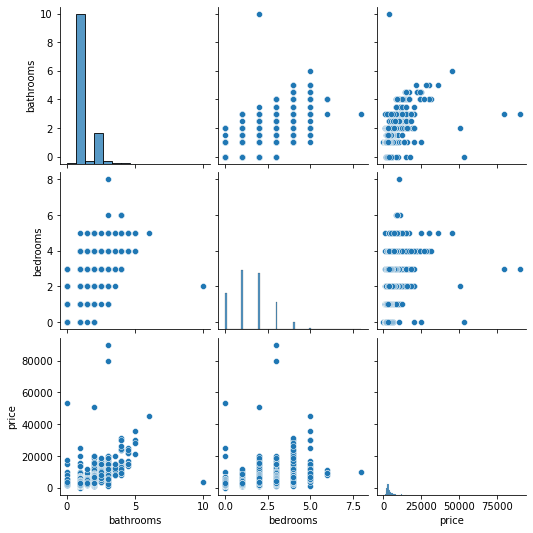

In [128]:
sns.pairplot(df)

- inter feature relationship:
- bathrooms,bedrooms and price are correlated with each other

In [129]:
df["location"].value_counts()

Manhattan              3040
New York City          2907
Long Island City       1761
Weehawken               735
Brooklyn                374
Edgewater               256
Inwood                  198
Guttenberg              135
East New York           107
Borough of Queens        81
Bensonhurst              66
Fort Lee                 52
Hoboken                  45
Jamaica                  31
Coney Island             25
The Bronx                24
East Atlantic Beach       5
Bayonne                   3
Atlantic Beach            2
Braintree                 2
Lake Success              2
Mount Vernon              2
Hoosick Falls             1
South Valley Stream       1
Boston                    1
West New York             1
White Plains              1
Perth Amboy               1
Nissequogue               1
New Rochelle              1
Yonkers                   1
Port Byron                1
Needham                   1
Takoradi                  1
Amagansett                1
Evergreen Park      

- Majority of apartments are from manhattan & newyork  city

### Feature Engineering

In [130]:
df.dtypes

bathrooms         float64
bedrooms            int64
price               int64
interest_level     object
location           object
days_created       object
dtype: object

- converting object to category for label encoding

In [131]:
c=df.select_dtypes(include="object")

In [132]:
for i in c:
    df[i]=df[i].astype("category")

In [133]:
df.dtypes

bathrooms          float64
bedrooms             int64
price                int64
interest_level    category
location          category
days_created      category
dtype: object

- Label encoding

In [134]:
for i in c:
    df[i]=LabelEncoder().fit_transform(df[i])

In [135]:
df.head()

,bathrooms,bedrooms,price,interest_level,location,days_created
0,1.0,0,2800,0,22,80
1,1.0,1,2100,0,21,69
2,1.0,1,3000,0,21,55
3,1.0,2,3000,0,36,57
4,1.0,2,3300,0,22,43


<AxesSubplot:>

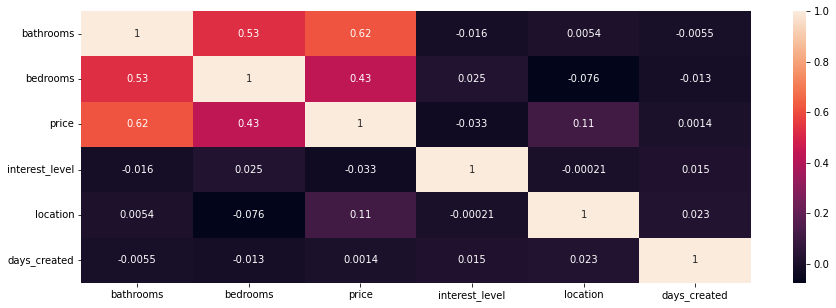

In [136]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

- Interest level is our target variable
- all are less correlated with target.so considering all for modelling

In [137]:
df.dtypes

bathrooms         float64
bedrooms            int64
price               int64
interest_level      int32
location            int32
days_created        int32
dtype: object

- standard scaling for 0 mean and unit SD

In [138]:
df1=df.loc[:,df.columns!="interest_level"]
scaler=StandardScaler()
y=df["interest_level"]
df=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df["interest_level"]=y

In [139]:
df.head()

,bathrooms,bedrooms,price,location,days_created,interest_level
0,-0.41959,-1.385892,-0.337084,-0.097481,1.403914,0
1,-0.41959,-0.482256,-0.610544,-0.259938,0.983718,0
2,-0.41959,-0.482256,-0.258952,-0.259938,0.448923,0
3,-0.41959,0.421379,-0.258952,2.176917,0.525322,0
4,-0.41959,0.421379,-0.141755,-0.097481,-0.009473,0


- Train test split

In [140]:
df.columns

Index(['bathrooms', 'bedrooms', 'price', 'location', 'days_created',
       'interest_level'],
      dtype='object')

In [141]:
#x=df.iloc[:,:-1]
x=df[["bathrooms","bedrooms","price","days_created"]]
y=df["interest_level"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Task5: Model Building

### Base Line model : Decision Tree Classifier

- finding best parameters for tree

In [142]:
dtc=DecisionTreeClassifier(random_state=42)

In [143]:
p={'max_depth':[4,5,6,7,8,9],'min_samples_leaf':[1,5,10,20,50]}

In [144]:
gs=GridSearchCV(estimator=dtc,param_grid=p,scoring="accuracy",n_jobs=-1,cv=10)

In [145]:
gs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 5, 10, 20, 50]},
             scoring='accuracy')

In [146]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [147]:
#building model with these hyperparameters

In [148]:
model=DecisionTreeClassifier(random_state=42,max_depth=4, min_samples_leaf=5).fit(x_train,y_train)

In [149]:
model.score(x_train,y_train)

0.7050224345057172

In [150]:
model.score(x_test,y_test)

0.687035786630655

### Random Forest Classifier

- finding best parameters for random forest

In [151]:
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [152]:
params = {
 'max_depth': [2,3,4,5],
 'min_samples_leaf': [1,2,3,4,5],
 'n_estimators': [10,25,30,50,100]
}

In [153]:
gs = GridSearchCV(estimator=rfc,
                           param_grid=params,
                           cv = 10,
                           n_jobs=-1, verbose=3, scoring="accuracy")

In [154]:
gs.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 25, 30, 50, 100]},
             scoring='accuracy', verbose=3)

In [155]:
gs.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

- using these hyper parameters for our model

In [156]:
model2=RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=30,n_jobs=-1, random_state=42).fit(x_train,y_train)

In [157]:
#train accuracy

In [158]:
model2.score(x_train,y_train)

0.7069040382110291

In [159]:
#test accuracy

In [160]:
model2.score(x_test,y_test)

0.6924375422012155

### Task6: Comparing models

- y predicted for both the models vs actual y 

In [161]:
y_pred=model.predict(x_test)
y_pred2=model2.predict(x_test)

In [162]:
ydf=pd.DataFrame({"actual":y_test,"predcited by Decision Tree":y_pred,"predicted by Random forest":y_pred2})

In [163]:
ydf

,actual,predcited by Decision Tree,predicted by Random forest
9203,2,1,1
4291,1,1,1
4269,1,1,1
3381,1,1,1
7873,2,1,1
...,...,...,...
8984,2,1,1
6378,1,1,1
815,1,1,1
2404,1,1,1


- Using stratified k fold to find accuracy of different train test splits and find mean of all

In [164]:
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
m=DecisionTreeClassifier(max_depth=5, min_samples_leaf=3,random_state=42)
score=cross_val_score(m,x,y,scoring="accuracy",cv=skf)
print("accuracy mean of all folds:",score.mean())
score

accuracy mean of all folds: 0.698408767417726


array([0.70546559, 0.69908815, 0.704154  , 0.69098278, 0.69908815,
       0.69300912, 0.70212766, 0.69604863, 0.69300912, 0.70111449])

In [165]:
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
m=RandomForestClassifier(max_depth=5, min_samples_leaf=3, n_estimators=30,n_jobs=-1, random_state=42)
score=cross_val_score(m,x,y,scoring="accuracy",cv=skf)
print("accuracy mean of all folds:",score.mean())
score

accuracy mean of all folds: 0.6993208266164593


array([0.7034413 , 0.70111449, 0.70111449, 0.69503546, 0.69604863,
       0.69098278, 0.704154  , 0.69908815, 0.69908815, 0.70314083])

- all metrics for both the models

In [166]:
a1=accuracy_score(y_test,y_pred)
a2=accuracy_score(y_test,y_pred2)
p1=precision_score(y_test,y_pred,average='weighted')
p2=precision_score(y_test,y_pred2,average='weighted')
r1=recall_score(y_test,y_pred,average='weighted')
r2=recall_score(y_test,y_pred2,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
f2=f1_score(y_test,y_pred2,average='weighted')

In [167]:
metrics=pd.DataFrame({"Decision tree classifier":[a1,p1,r1,f1],"Random forest Classifier":[a2,p2,r2,f2]},index=["accuracy","precision","recall","f1 score"])

In [168]:
metrics

,Decision tree classifier,Random forest Classifier
accuracy,0.687036,0.692438
precision,0.613719,0.614464
recall,0.687036,0.692438
f1 score,0.594523,0.581650


In [169]:
#Decision Tree classifier was built with tuning hyper parameters.
# Then Random forest Classifier was built also by tuning hyper parameters.
# Ensemble model RF classifier has little higher accuracy even though there were 30 base trees .
#For this dataset and features it is not worth to build random forest classifier considering the complexity and its accuracy. All together model is not so good model.